<a href="https://colab.research.google.com/github/nadiya-k-a/Case-study-on-iris/blob/main/Model_Selection_Nadiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment Model Selection**


In [80]:
##importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
##Loading the dataset into python environment

df = pd.read_csv('/content/titanic-dataset.csv')

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [85]:
df.shape

(891, 12)

## Preprocessing

In [86]:
##dropping columns that are irrelevant for predicting the survivability
df['PassengerId'].nunique()

891

In [87]:
df.drop('PassengerId',axis = 1,inplace = True)

In [88]:
df.drop('Cabin',axis = 1,inplace =True )

In [89]:
df['Name'].nunique()

891

In [90]:
df['Ticket'].nunique()

681

In [91]:
df.drop(['Name','Ticket'],axis =1,inplace = True)

In [92]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## *Filling the missing values*

<Axes: >

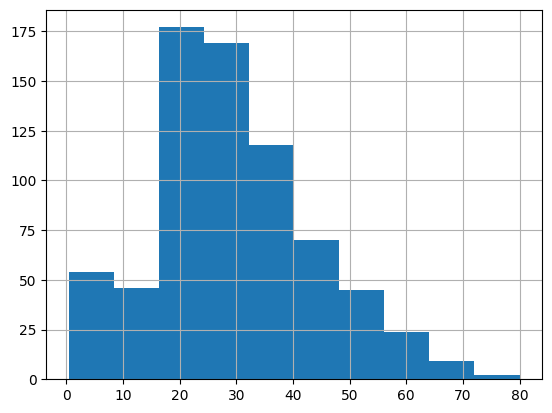

In [93]:
##plotting histogram of feature Age
df['Age'].hist()

In [94]:
##filling the missing values in 'Age'column with its median value
df['Age']=df['Age'].fillna(df['Age'].median())

In [95]:
##finding the mode of 'Embarked' column

df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [96]:
#filling the missing values in 'Embarked'column with its mode

df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [97]:
#checking if all the missing values have been filled

df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [98]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: >

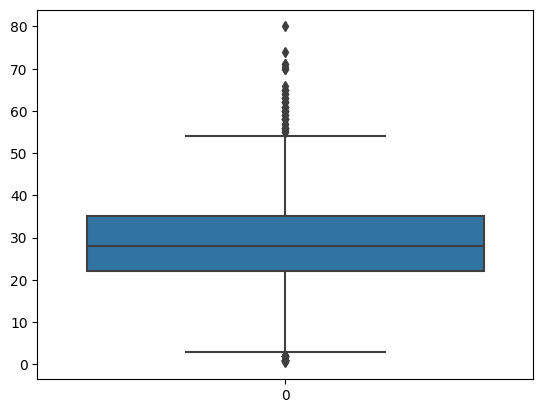

In [99]:
sns.boxplot(df['Age'])

In [100]:
##Encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']  = le.fit_transform(df['Sex'])
df['Embarked']  = le.fit_transform(df['Embarked'])

In [101]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### *Splitting the data into feature and target set*


In [102]:
x = df.drop('Survived',axis = 1)
y=df['Survived']

***Scaling***

In [103]:
#MIN-Max scaling done on age and fare column.

x1=x.drop(['Pclass','Sex','SibSp','Parch','Embarked'],axis=1)
x1

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


In [104]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler= MinMaxScaler(feature_range=(0,1))

x1= min_max_scaler.fit_transform(x1)

In [105]:
#converting array into dataframe

x1= pd.DataFrame(x1, columns=['Age','Fare'])

In [106]:
x.drop(['Age','Fare'],axis=1,inplace=True)
x

,Pclass,Sex,SibSp,Parch,Embarked
0,3,1,1,0,2
1,1,0,1,0,0
2,3,0,0,0,2
3,1,0,1,0,2
4,3,1,0,0,2
...,...,...,...,...,...
886,2,1,0,0,2
887,1,0,0,0,2
888,3,0,1,2,2
889,1,1,0,0,0


In [107]:
x=pd.concat([x,x1],axis=1)

In [108]:
x

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
0,3,1,1,0,2,0.271174,0.014151
1,1,0,1,0,0,0.472229,0.139136
2,3,0,0,0,2,0.321438,0.015469
3,1,0,1,0,2,0.434531,0.103644
4,3,1,0,0,2,0.434531,0.015713
...,...,...,...,...,...,...,...
886,2,1,0,0,2,0.334004,0.025374
887,1,0,0,0,2,0.233476,0.058556
888,3,0,1,2,2,0.346569,0.045771
889,1,1,0,0,0,0.321438,0.058556


## **Creating Models**

In [109]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## **KNN MODEL**

In [110]:
# importing libraries for KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#model creation
metric_k=[]
neighbors= range(3,15)

for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier= classifier.fit(x_train,y_train)
    y_pred_kNN= classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

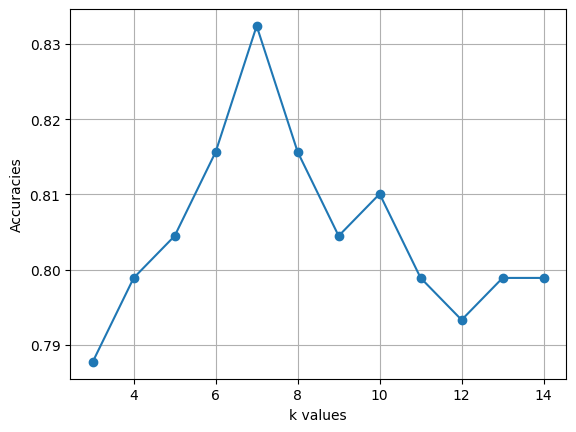

In [111]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [112]:
# Instantiate learning model
classifier= KNeighborsClassifier(n_neighbors=7)
# Fitting the model
classifier= classifier.fit(x_train,y_train)

In [113]:
# Importing libraries
from sklearn.model_selection import KFold

kfold_validator=KFold(10)

In [114]:
# Importing libraries
from sklearn.model_selection import cross_val_score

cv_result=cross_val_score(classifier,x,y,cv=kfold_validator)

In [115]:
cv_result

array([0.76666667, 0.79775281, 0.75280899, 0.78651685, 0.85393258,
       0.82022472, 0.82022472, 0.69662921, 0.84269663, 0.76404494])

In [116]:
np.mean(cv_result)

0.7901498127340824

## **Stratified K-Fold Cross Validation for KNN Model**

In [117]:
# Importing libraries
from sklearn.model_selection import StratifiedKFold

skfold_validator=StratifiedKFold(n_splits=10 )

In [118]:
skcv_result=cross_val_score(classifier,x,y,cv=skfold_validator)

In [119]:
skcv_result

array([0.75555556, 0.80898876, 0.73033708, 0.7752809 , 0.87640449,
       0.82022472, 0.83146067, 0.71910112, 0.80898876, 0.76404494])

In [120]:
np.mean(skcv_result)

0.7890387016229713

# **Support Vector Machine Model**

In [121]:
# Importing libraries for SVM model
from sklearn.svm import SVC

# Instantiate learning model
svm_clf2=SVC(kernel='rbf')
# Fitting the model
svm_clf2=svm_clf2.fit(x_train,y_train)

## **K-Fold Cross Validation for SVM**


In [122]:
kfold_validator=KFold(10)

In [123]:
cv_result=cross_val_score(svm_clf2,x,y,cv=kfold_validator)

In [124]:
np.mean()

array([0.78888889, 0.84269663, 0.76404494, 0.85393258, 0.79775281,
       0.80898876, 0.78651685, 0.7752809 , 0.85393258, 0.79775281])

In [125]:
np.mean(cv_result)


0.8069787765293384

## **Stratified K-Fold Cross Validation for SVM**


In [127]:
skfold_validator=StratifiedKFold(n_splits=10)

In [126]:
skcv_result=cross_val_score(svm_clf2,x,y,cv=skfold_validator)

In [128]:
skcv_result

array([0.8       , 0.82022472, 0.7752809 , 0.85393258, 0.83146067,
       0.78651685, 0.80898876, 0.78651685, 0.82022472, 0.79775281])

In [129]:
np.mean(skcv_result)       #average accuracy score

0.8080898876404493

### **For KNN Model, K-Fold Cross Validation Score is 0.7901498127340824 and Stratified K-Fold Cross Validation score 0.7890387016229713**

### **For SVM Model,K-Fold Cross Validation Score is 0.8069787765293384 and Stratified K-Fold Cross Validation score is 0.8080898876404493**